In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)) , sep=';')
df.head()

Saving water_quality.csv to water_quality.csv


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [3]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64


In [4]:
# date is in object - date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [5]:
df_imputed = df.copy()
columns_to_impute = ["NH4", "BSK5", "Suspended", "O2", "NO3", "NO2", "SO4", "PO4", "CL"]

imputer = SimpleImputer(strategy="mean")
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

print("Missing values after imputation:")
print(df_imputed.isnull().sum())


Missing values after imputation:
id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
dtype: int64


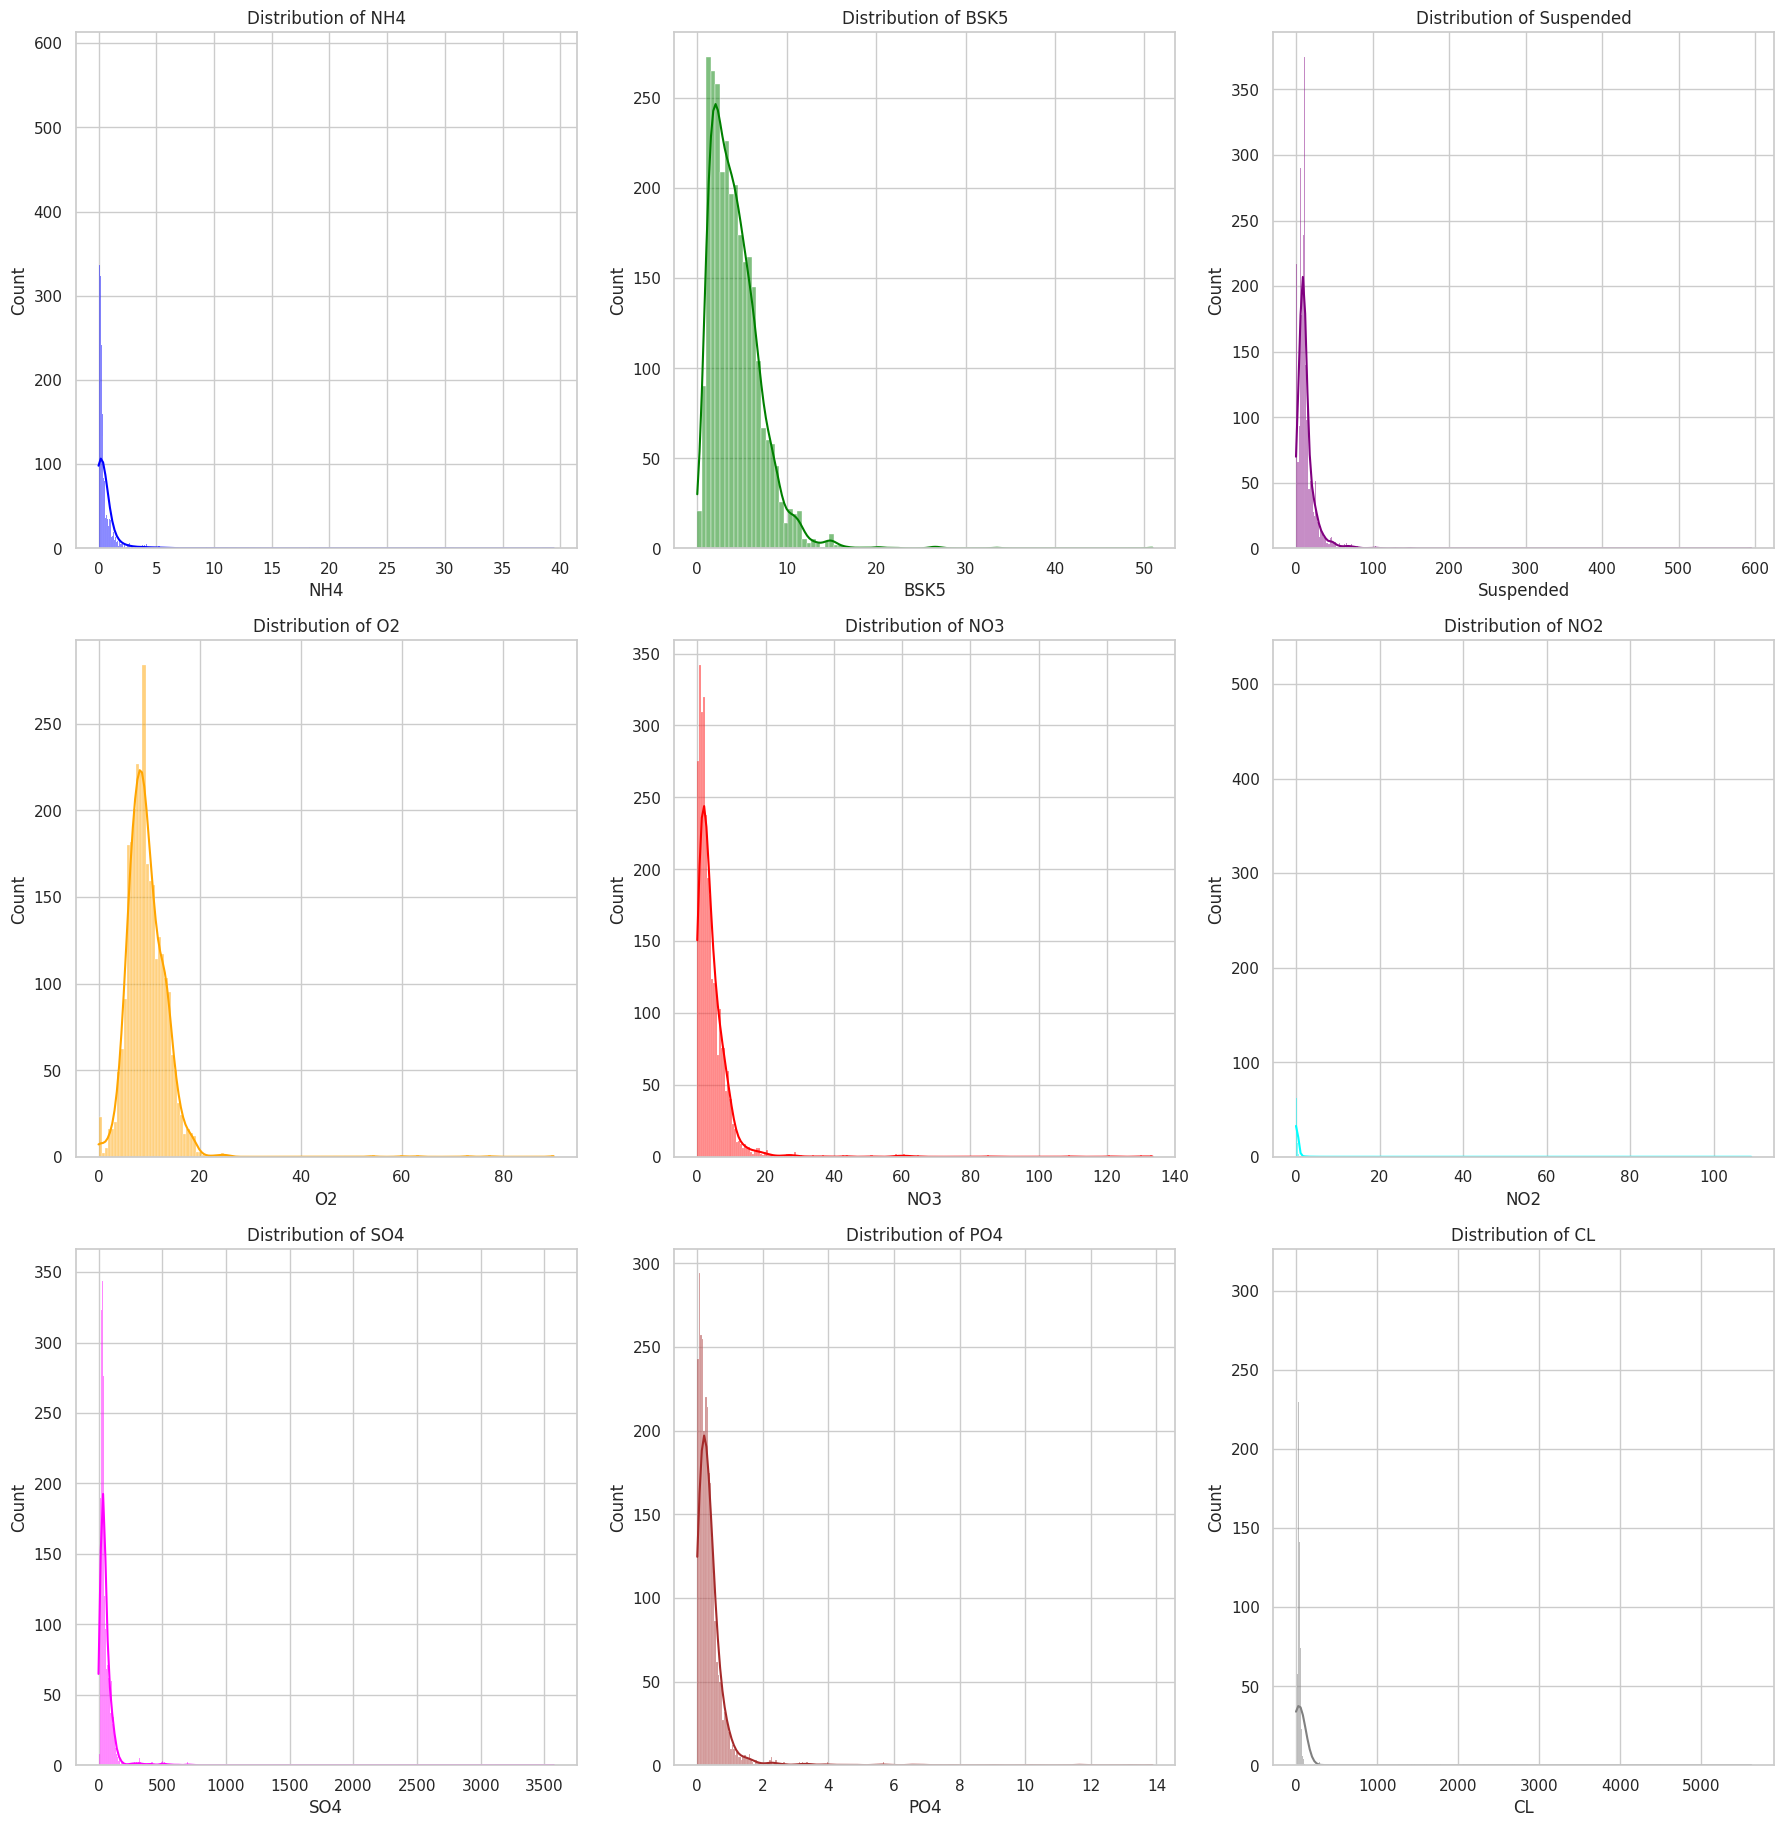

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(18, 24))
colors = ['blue', 'green', 'purple', 'orange', 'red', 'cyan', 'magenta', 'brown', 'gray']
columns = ["NH4", "BSK5", "Suspended", "O2", "NO3", "NO2", "SO4", "PO4", "CL"]

for i, col in enumerate(columns):
    r, c = divmod(i, 3)
    sns.histplot(df_imputed[col], kde=True, ax=ax[r, c], color=colors[i])
    ax[r, c].set_title(f"Distribution of {col}")

# Remove unused subplots
for j in range(len(columns), 12):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()


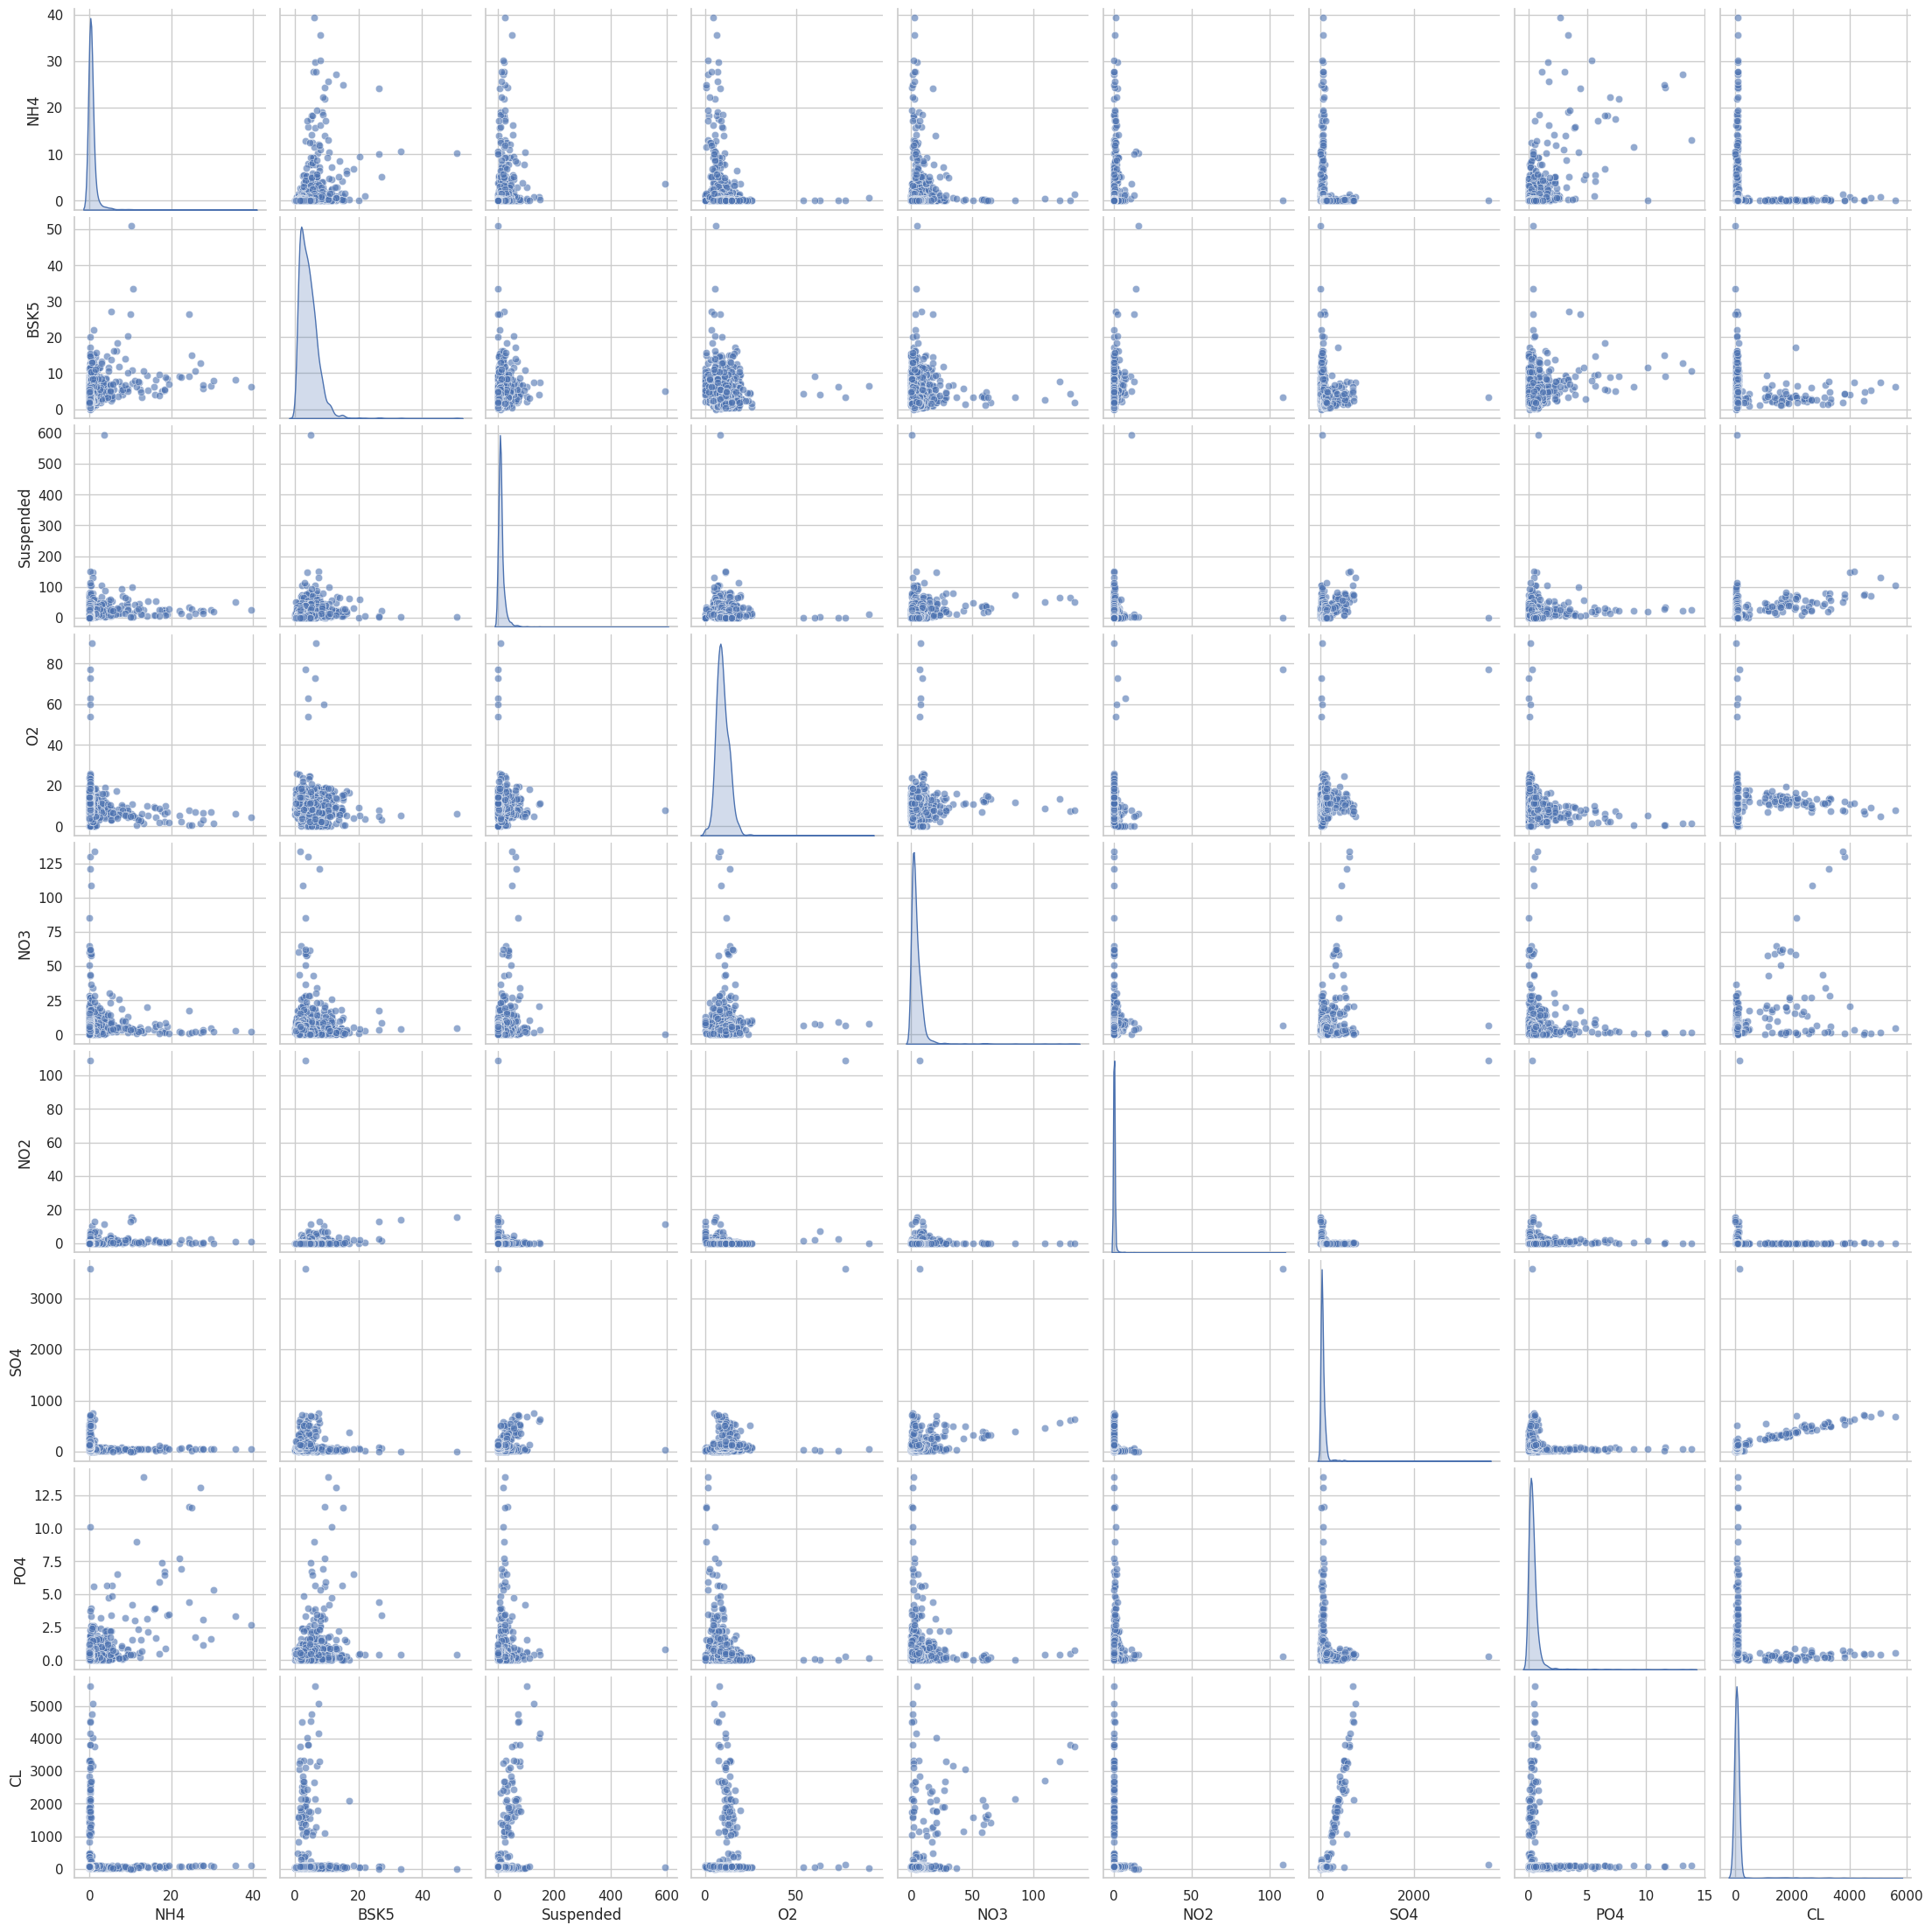

In [7]:
sns.pairplot(df_imputed[columns], diag_kind="kde", plot_kws={'alpha': 0.6})
plt.show()


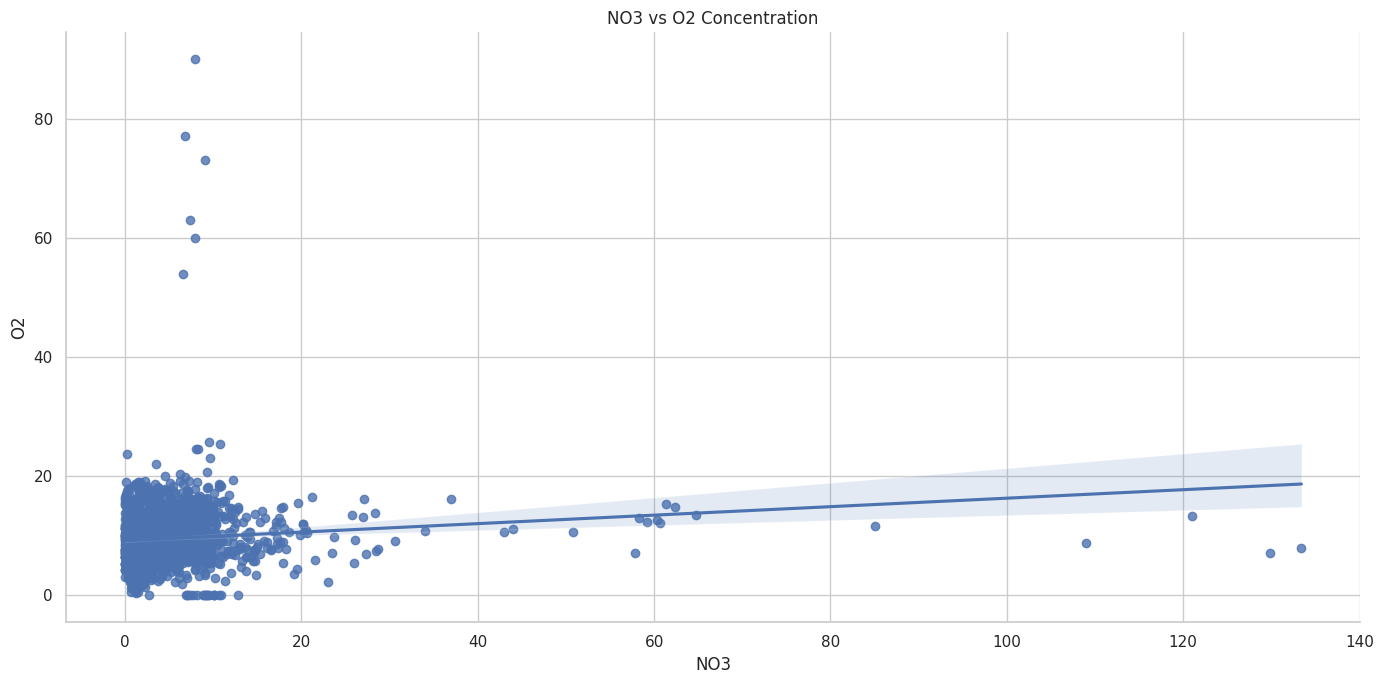

In [8]:
sns.lmplot(x="NO3", y="O2", data=df_imputed, height=7, aspect=2)
plt.title("NO3 vs O2 Concentration")
plt.tight_layout()
plt.show()


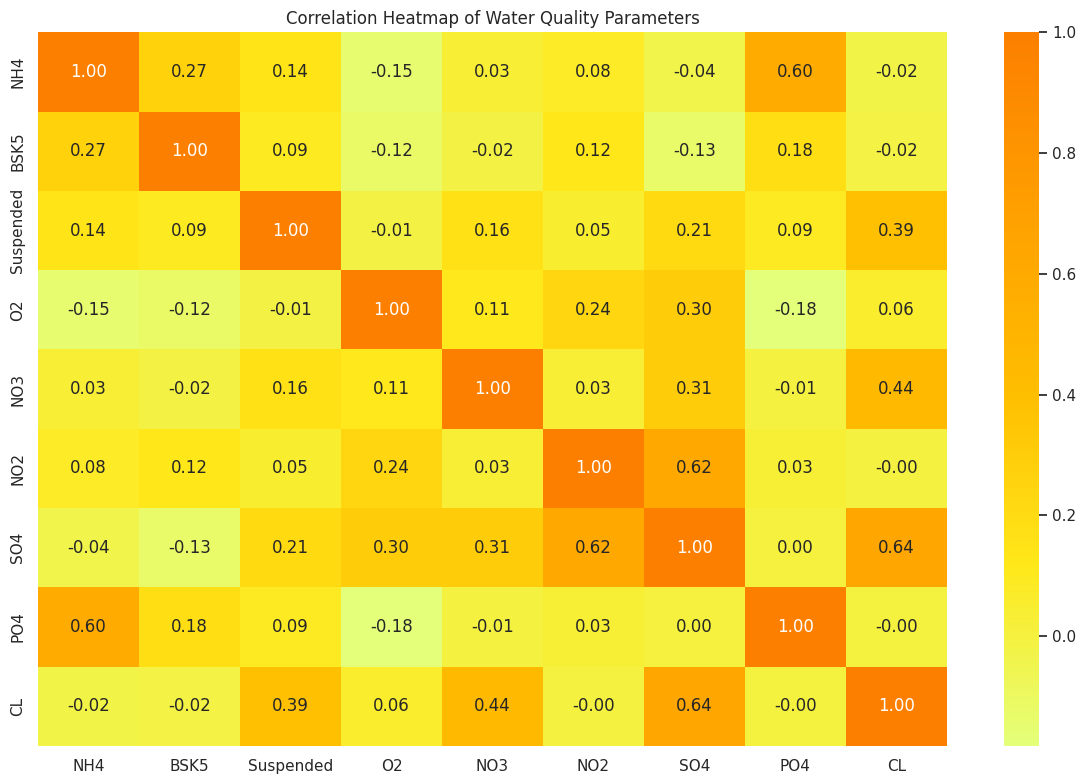

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed[columns].corr(), cmap="Wistia", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.tight_layout()
plt.show()


In [10]:
y_final = df_imputed["O2"]
X_final = df_imputed.drop(columns=["O2"])


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (1916, 10)
X_test: (945, 10)
y_train: (1916,)
y_test: (945,)


In [12]:
# Drop the 'date' column as it is not a numerical feature for scaling
X_final = df_imputed.drop(columns=["O2", "date"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Normalize
n_scaler = MinMaxScaler()
X_train_normalized = n_scaler.fit_transform(X_train)
X_test_normalized = n_scaler.transform(X_test)

# Standardize
s_scaler = StandardScaler()
X_train_standardized = s_scaler.fit_transform(X_train)
X_test_standardized = s_scaler.transform(X_test)

print("Normalized training data sample:\n", X_train_normalized[:5])
print("Standardized training data sample:\n", X_train_standardized[:5])

X_train: (1916, 9)
X_test: (945, 9)
y_train: (1916,)
y_test: (945,)
Normalized training data sample:
 [[4.28571429e-01 1.48417810e-02 1.04125737e-01 1.68067227e-02
  7.87106447e-03 8.25688073e-04 6.88419992e-03 7.92564306e-03
  4.48420910e-03]
 [6.66666667e-01 5.60067208e-03 1.35559921e-01 1.00840336e-02
  7.64617691e-03 4.58715596e-04 9.15934404e-03 2.08948772e-02
  4.09241959e-03]
 [2.85714286e-01 2.80033604e-03 1.04125737e-01 1.34453782e-02
  1.72413793e-02 1.00917431e-03 1.15716125e-02 2.08948772e-02
  4.41297464e-03]
 [7.14285714e-01 7.28087370e-03 2.08251473e-01 1.17647059e-02
  4.42278861e-02 2.01834862e-03 7.72373650e-03 2.44974422e-02
  3.18418025e-03]
 [4.28571429e-01 7.56090731e-03 1.02161100e-01 1.84873950e-02
  7.49625187e-03 4.58715596e-04 5.48497230e-03 2.59384682e-02
  3.48692670e-03]]
Standardized training data sample:
 [[-0.39946004 -0.10177784  0.3033136  -0.17913475 -0.46168203 -0.06927555
  -0.32675245 -0.37799627 -0.16918092]
 [ 0.42564285 -0.23446298  0.81993806 

In [13]:
pollutants = ["NH4", "BSK5", "Suspended", "NO3", "NO2", "SO4", "PO4", "CL"]


In [14]:
df_imputed['year'] = df_imputed['date'].dt.year
X = df_imputed[['id', 'year']]
y = df_imputed[pollutants]


In [15]:
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()


Model Performance on the Test Data:
NH4:
   MSE: 2.1421952983131662
   R2: 0.7860601661130537

BSK5:
   MSE: 7.8531504438389526
   R2: 0.2757921803954989

Suspended:
   MSE: 175.75428236088644
   R2: -0.5217120352953564

NO3:
   MSE: 17.765613544688055
   R2: 0.5194041858679409

NO2:
   MSE: 5.692627739774803
   R2: -7.247223037386126

SO4:
   MSE: 2688.4436530163603
   R2: 0.31966744857823437

PO4:
   MSE: 0.4466762565622493
   R2: 0.3512239952967634

CL:
   MSE: 34492.87945466878
   R2: 0.730477204034535



In [19]:
station_id = '67'  # use correct type based on your dataset, maybe int
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Ensure the new input has the same columns as training data
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # Reorder

predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")



Predicted pollutant levels for station '67' in 2024:
  NH4: 0.26
  BSK5: 5.13
  Suspended: 20.38
  NO3: 5.29
  NO2: 0.08
  SO4: 371.52
  PO4: 0.27
  CL: 1463.59


In [20]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and column structure saved!')


Model and column structure saved!


In [21]:
import gradio as gr
import pandas as pd

def predict_pollutants(station_id, year):
    # Prepare input DataFrame
    input_data = pd.DataFrame({'year': [year], 'id': [station_id]})
    input_encoded = pd.get_dummies(input_data, columns=['id'])

    # Align columns with training data
    missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0
    input_encoded = input_encoded[X_encoded.columns]  # Reorder columns

    # Predict
    predicted = model.predict(input_encoded)[0]

    # Format results
    result = {pollutants[i]: round(predicted[i], 2) for i in range(len(pollutants))}
    return result

# Create Gradio interface
inputs = [
    gr.Textbox(label="Station ID"),
    gr.Number(label="Year")
]

outputs = gr.Label(label="Predicted Pollutants")

gr.Interface(
    fn=predict_pollutants,
    inputs=inputs,
    outputs=outputs,
    title="Water Pollutant Level Prediction",
    description="Enter station ID and year to get predicted levels for NH4, NO3, SO4, etc."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3394739238b4c4b85d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
